In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,total_area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType1
0,houses,NaN,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5 Bedrooms,4,2,not available,1.0,North-East,undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,(92 sq.m.) Carpet Area
1,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.),3,4,3,"servant room,store room",12,North,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",NaN
2,flat,emaar mgf the palm drive,sector 66,3.00,14285.0,2100.0,Super Built up area 2100(195.1 sq.m.),4,5,3,servant room,10,East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 248A', 'Hasanpur', 'Ashoka International School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi Gurgaon', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '1 Water Purifier', '7 Fan', '1 Exhaust Fan', '5 Geyser', '25 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN
3,houses,NaN,sector 43,5.75,29716.0,1935.0,Plot area 215(179.77 sq.m.),4 Bedrooms,4,2,"servant room,pooja room,store room",2.0,North,10+ Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']",NaN,"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Waste Disposal']",(180 sq.m.) Plot Area
4,flat,m3m merlin,sector 67,4.50,14267.0,3154.0,Super Built up area 3154(293.02 sq.m.),4,4,3,servant room,15,S

In [5]:
# focus: areawithtype, additionalroom, ageposession, furnishdetails, features

In [6]:
df[['total_area','areaWithType']].sample(5)

,total_area,areaWithType
1444,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 241 sq.yards (201.51 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.)
997,915.0,Super Built up area 915(85.01 sq.m.)
283,1825.0,Super Built up area 1825(169.55 sq.m.)
3026,1569.0,Super Built up area 1568(145.67 sq.m.)
3543,1744.0,Super Built up area 1744(162.02 sq.m.)Built Up area: 1630 sq.ft. (151.43 sq.m.)Carpet area: 1290 sq.ft. (119.84 sq.m.)


## 1. areawithtype

In [7]:
df[['total_area','areaWithType']].sample(5)

,total_area,areaWithType
2180,1150.0,Carpet area: 1150 (106.84 sq.m.)
3373,2085.0,Super Built up area 1943(180.51 sq.m.)
1794,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)
287,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)
2448,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)


In [8]:
#domain knowledge
#carpet area: area on which the house is built
#builtup area: carpet area + thickness of walls + balcony
#superbuiltup area: builtup area + area outside your house like stairs area
#or common garden area or common property

In [9]:
#values in total_area column are nt consistent
#sometime its superbuiltup area, sometime its carpet area, sometime its builtup area
#so total_area is not useful as showing wrong information
#we need to create 3 new columns from "areaWithType" column as: carpet_area, builtup_area, superbuiltup_area

In [10]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [11]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [13]:
import re

# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [14]:
df[['price','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,total_area,areaWithType,super_built_up_area,built_up_area,carpet_area
3624,0.95,flat,1300.0,Carpet area: 1300 (120.77 sq.m.),NaN,NaN,1300.0
1497,1.45,flat,1480.0,Built Up area: 1480 (137.5 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),NaN,1480.0,1050.0
1198,5.00,flat,2900.0,Carpet area: 2900 (269.42 sq.m.),NaN,NaN,2900.0
185,1.30,flat,1210.0,Super Built up area 1210(112.41 sq.m.),1210.0,NaN,NaN
2682,1.70,flat,1980.0,Super Built up area 1630(151.43 sq.m.),1630.0,NaN,NaN


In [15]:
df.duplicated().sum()

122

In [16]:
#extracting columns where atleast 1 value is missing
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [17]:
#extracting how many of those are of plot bcoz it will have all 3 values missing
df[df['areaWithType'].str.contains('Plot')][['price','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [18]:
#checking how many missing values in last 3 columns
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
total_area               18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                    0
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
areaWithType1          2943
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [19]:
#createing a seperate df of rows where all 3 columns values are missing
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.head()

,price,property_type,total_area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.75,houses,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
10,2.25,houses,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
31,6.25,houses,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
35,7.00,houses,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
61,7.35,houses,1760.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN


In [20]:
#exrtacting index of all nan rows
#which will be helpful in future
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [21]:
#all_nan_df contains plot area so extracted plot area & fill builtup_area

In [22]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [23]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [24]:
all_nan_df

,price,property_type,total_area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.75,houses,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
10,2.25,houses,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
31,6.25,houses,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
35,7.00,houses,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
61,7.35,houses,1760.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN
63,0.65,houses,585.0,Plot area 65(54.35 sq.m.),NaN,65.00,NaN
68,2.10,houses,549.0,Plot area 61(51 sq.m.),NaN,61.00,NaN
73,4.95,houses,2403.0,Plot area 267(223.25 sq.m.),NaN,267.00,NaN
91,1.55,houses,1053.0,Plot area 117(97.83 sq.m.),NaN,117.00,NaN
100,9.55,houses,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN


In [25]:
#there is a discripancy in total_area & plot area or builtup area
#discripancy is in units, plot area is in "yards"

In [26]:
# in 3rd row
692.00 * 9

6228.0

Here's the formula:
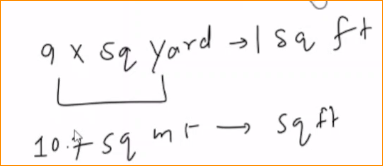

In [27]:
#this function will change all values based on whichever units they are currently in to sq.ft

def convert_scale(row):
    if np.isnan(row['total_area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['total_area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['total_area']/row['built_up_area']) == 110:
            return row['built_up_area'] * 10.7
        else:
            row['built_up_area']

In [28]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis=1)

In [29]:
all_nan_df

,price,property_type,total_area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,5.75,houses,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.0,NaN
10,2.25,houses,900.0,Plot area 100(83.61 sq.m.),NaN,900.0,NaN
31,6.25,houses,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.0,NaN
35,7.00,houses,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
61,7.35,houses,1760.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
63,0.65,houses,585.0,Plot area 65(54.35 sq.m.),NaN,585.0,NaN
68,2.10,houses,549.0,Plot area 61(51 sq.m.),NaN,549.0,NaN
73,4.95,houses,2403.0,Plot area 267(223.25 sq.m.),NaN,2403.0,NaN
91,1.55,houses,1053.0,Plot area 117(97.83 sq.m.),NaN,1053.0,NaN
100,9.55,houses,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.0,NaN


In [30]:
#update original df
# The df.update(all_nan_df) function in Pandas is used to modify a DataFrame (df)
# by updating its values with the values from another DataFrame (all_nan_df).
# This function updates the values in df where the values in all_nan_df are not NaN.

In [31]:
df.update(all_nan_df)

In [32]:
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
total_area               18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                    0
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
areaWithType1          2943
super_built_up_area    1888
built_up_area          2228
carpet_area            1859
dtype: int64

In [33]:
#we still have some missing values in builtup area but lesser then earlier

## 2. additionalRoom

In [34]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [35]:
#there are so many categories with mixed & grouped values
#there are mainly 5 types of rooms: servant, pooja, other, store, study
#so we can divide additional room into 5 new columns with thier values "0 OR 1"

In [36]:
#list of columns to be created
new_cols = ['study room','servant room','store room','pooja room','others']

In [37]:
#populate new columns based on additional room
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [38]:
df.sample(5)[['additionalRoom','study room','servant room','store room','pooja room','others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2747,not available,0,0,0,0,0
2407,not available,0,0,0,0,0
2613,not available,0,0,0,0,0
452,not available,0,0,0,0,0
2710,servant room,0,1,0,0,0


In [39]:
df.sample()

,property_type,society,sector,price,price_per_sqft,total_area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType1,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
2947,flat,orris aster court premier,sector 85,1.38,6509.0,2120.0,Super Built up area 2120(196.95 sq.m.)Built Up area: 1616 sq.ft. (150.13 sq.m.),3,4,2,servant room,6,North-East,1 to 5 Year Old,"['Propose Metro Station', 'SS Omnia Mall', 'National Highway 8', 'Gurgaon Toll', 'Rajiv Chowk', 'The Heritage Pride Modern School', 'Bharat Ram Global School', 'RPS International School', 'Delhi Public School', 'Matrikiran High School', 'Lions Public School', 'Genesis Hospital', 'Miracles Apollo Cradle / Spectra', 'Silver Streak Multi Speciality', 'IGI Airport']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM']",NaN,2120.0,1616.0,NaN,0,1,0,0,0


## 3. agePossesion

In [40]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Dec-25                   7
Jan-24                   7
Aug-23                   7
Jun-24                   5
Nov-23                   5
Jul-24                   4
Sep-23                   4
Aug-24                   4
By 2025                  4
Jan-25                   3
May-24                   3
Feb-24                   3
Nov-24                   3
Oct-23                   3
Jan-26                   2
Apr-26                   2
Jun 2024                 2
Oct-25                   2
Mar-25                   2
Jul-27                   2
By 2027                  2
Aug-25                   2
Jul-25        

In [41]:
# columns have so many different categories
# we need to bring them into similar scale

In [42]:
def categorize_age_possesion(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderatley Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value:
        return "Under Construction"
    try:
        #for entries like "May 2024"
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [43]:
df['agePossession'].apply(categorize_age_possesion).value_counts()

agePossession
Relatively New        1676
New Property           626
Moderatley Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [44]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possesion)

## 4. furnishDetails

In [45]:
df[['furnishDetails','features']].sample(3)

,furnishDetails,features
3299,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2730,"['2 Wardrobe', '3 Fan', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
288,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [46]:
# this is a very tricky column which have a lot of details insingle column
# extract all unique item counts lets say its 18, so we can create 18 new columns
# with value as thier count values
# since these items may not be so important & also have co-relation
# so another approach could be --> creating a new column "furnishing type" which 
# will have 3 values: 1. Furnished, 2. Semi furnished, 3. Unfurnished
# but there is no set count which will diffrentiate b/w these 3 so we can use
# "clustering" to create 18 new columns as 1st approach

In [47]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [48]:
furnishings_df.shape

(3803, 19)

In [49]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\iampr\AppData\Local\Temp\ipykernel_9816\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [50]:
furnishings_df.sample(5)

,Fan,Curtains,Bed,Exhaust Fan,TV,Water Purifier,Geyser,Microwave,Modular Kitchen,Chimney,Wardrobe,Light,AC,Stove,Fridge,Washing Machine,Dining Table,Sofa
2933,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0
2902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1587,0,0,0,1,0,0,3,0,1,1,3,0,4,0,0,0,0,0
2682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#applying kmeans clustering on this data

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [54]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

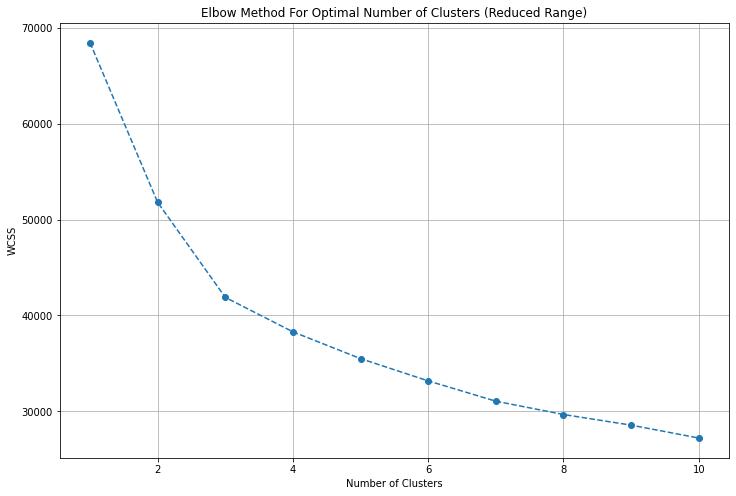

In [55]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [56]:
# using elbow method we can find out the place where slope value is reducing
# which means thats the no of columns we can categorize our data into
# thats 3

In [57]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data) 

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
df = df.iloc[:,:-18]

In [59]:
df['furnishing_type'] = cluster_assignments

In [64]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished
# basically its automatically able to understand which features comes under
# furnished, semi furnished & unfurnished
# Its not 100% correct method but it has greatly improved 
# rest we can firhure it out at the time of EDA whether it's working or not

,furnishDetails,furnishing_type
994,NaN,1
2099,[],1
254,NaN,1
2059,[],1
748,"['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5. Features

In [65]:
df['features'].sample(5)

2054    ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']
220                                                                                                                                                                                                                                                                                        

In [67]:
# this is same as earlier column with a list of values
# It contains all the ameneties you get with the property

In [68]:
df['features'].isnull().sum()

635

In [69]:
# there are 635 missing values, we'll fill those with data we have in
# apartment file using merge

In [71]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [72]:
#bcoz in flats data.. society names are in lower
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [73]:
#extract all the rows with null values in features column
temp_df = df[df['features'].isnull()]

In [74]:
temp_df.shape

(635, 27)

In [82]:
#now merged temp df with app df 
temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['features','TopFacilities']]

,features,TopFacilities
0,NaN,NaN
1,NaN,NaN
2,NaN,"['Valet Parking', 'Swimming Pool', 'Football', 'Laundry', 'Flower Garden', 'School', 'ATM', 'Card Room', 'Jacuzzi']"
3,NaN,"['Swimming Pool', 'Laundry', 'Volley Ball Court', 'ATM', 'Visitors Parking', 'Restaurant', 'Creche/Day care', 'Skating Rink', 'Grocery Shop']"
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [83]:
#some of the data found in apartment file & na values in flats file is filled with those

In [84]:
#we just have to replace nan value with the values found
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [85]:
df.loc[temp_df.index,'features'] = x.values

In [86]:
df['features'].isnull().sum()

481

In [88]:
#now handle non missing values
df['features'].sample(2)

1033    ['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']
277                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [91]:
#there are about 130 unique amenties, so we can create binary columns of each ameneties
#which will have value 0 or 1, so it'll be a 130 dimension vector metrix for each flat
#later we can cluster these vectors into categories

In [92]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [93]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [94]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2057,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
features_binary_df.shape

(3803, 130)

In [96]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

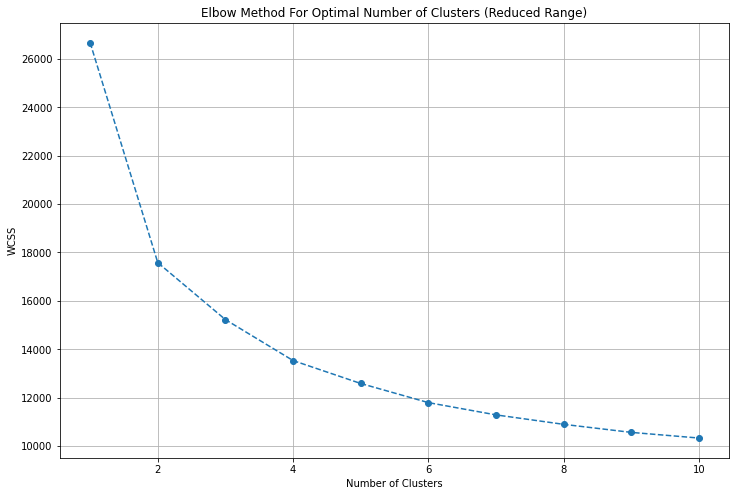

In [97]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [101]:
#elbow curve shows 2 categpries --> budget & luxury
#all nan values are categorize into budget & rest in luxury
#so this approach failed.. we can tune clustring algorithm
#but we have changed approach --> rather then creating category coumn
#we'll create a numerical column called "luxury score" on the basis
#of amaneties available using chatgpt

In [98]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [102]:
df['luxury_score'] = luxury_score

In [103]:
df.head()

,property_type,society,sector,price,price_per_sqft,total_area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,areaWithType1,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,houses,NaN,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5 Bedrooms,4,2,not available,1.0,North-East,Undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,(92 sq.m.) Carpet Area,NaN,NaN,110.0,0,0,0,0,0,1,[],0
1,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.),3,4,3,"servant room,store room",12,North,Relatively New,"['Airia Mall', 'Golf Course Extn Road', 'Sohna Road', 'Southern Peripheral Rd, Gurugram', 'Kunskapsskolan International', 'Ektaa Hospitals Main Sohna Rd', 'Sanjeevani Hospital - Child Specialist', 'Federal Bank Sector 71', 'Central Bank Of India Sohna Rd', 'Axis Bank, Sohna Rd', 'Spaze Palazo, Golf Course Ext Rd', 'VATIKA BUSINESS PARK Sohna Rd', 'The Medicity, Spaze iTech Park', 'Tulip Violet Society, Sector 69', 'IndianOil, Hasanpur']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']",NaN,1950.0,NaN,NaN,0,1,1,0,0,1,"[Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Shopping Centre, Fitness Centre / GYM, Club house / Community Center, Water softening plant]",56
2,flat,emaar mgf the palm drive,sector 66,3.00,14285.0,2100.0,Super Built up area 2100(195.1 sq.m.),4,5,3,servant room,10,East,Relatively New,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 248A', 'Hasanpur', 'Ashoka International School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi Gurgaon', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '1 Water Purifier', '7 Fan', '1 Exhaust Fan', '5 Geyser', '25 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,2100.0,NaN,NaN,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
3,houses,NaN,sector 43,5.75,29716.0,1935.0,Plot area 215(179.77 sq.m.),4 Bedrooms,4,2,"servant room,pooja room,store room",2.0,North,Old Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 

In [104]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [105]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,total_area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,areaWithType1,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2971,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3,4,3,9,North,Relatively New,NaN,2077.0,NaN,1600.0,0,1,0,0,0,1,49
2311,flat,ansal heights 86,sector 86,0.67,5100.0,1314.0,Super Built up area 1360(126.35 sq.m.),2,2,1,10,not available,Relatively New,NaN,1360.0,NaN,NaN,0,0,0,0,0,1,115
3351,flat,shapoorji pallonji joyville gurugram,sector 102,2.12,16960.0,1250.0,Built Up area: 1852 (172.06 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.),3,3,3,9,not available,Relatively New,NaN,NaN,1852.0,1250.0,0,0,0,0,0,1,72
262,flat,ats triumph,sector 104,2.00,8733.0,2290.0,Super Built up area 2290(212.75 sq.m.),3,4,3,4,not available,Relatively New,NaN,2290.0,NaN,NaN,0,1,0,0,0,1,60
2047,flat,aipl club residences,sector 70a,0.85,9139.0,930.0,Super Built up area 930(86.4 sq.m.),2,2,2,5,South-East,Relatively New,NaN,930.0,NaN,NaN,0,0,0,0,0,0,45


In [106]:
df.shape

(3803, 24)

In [107]:
df.to_csv('flats_feature_engineered.csv',index=False)

In [108]:
#now we can perform EDA on this data, fill missing values & outliar detection